<span style="font-family: 'Times New Roman'; font-size: 24px; color: white; font-weight: bold;">Exploratory Analysis and Preparation of Data</span>

<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">0. Import libraries and load data</span>

In [1]:
import pandas as pd
from openpyxl import load_workbook
import processing_functions as pf
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
parent_dir = os.path.abspath('..')
data_path = os.path.join(parent_dir, 'datasets')
files = os.listdir(data_path)
files.remove('URL descripcion reto.txt')
files.remove('leeme.txt')
dfs = {}

def open_file(file_name):
    """
    Function to load all sheets from an Excel file into a global dictionary as separate DataFrames.

    Args:
        file_name (str): The name of the Excel file to be loaded (must be located in the directory defined by 'data_path').

    Functionality:
    - Constructs the full file path by combining the base data directory ('data_path') and the given file name.
    - Reads all sheets from the specified Excel file into a dictionary, where each sheet is a key-value pair 
      (key: sheet name, value: corresponding DataFrame).
    - Assigns a unique name to each DataFrame by combining the file name (without its '.xlsx' extension) and the sheet name.
    - Stores each DataFrame in a global dictionary 'dfs', allowing for easy access using the unique names as keys.

    Note:
    - This function relies on the global variables 'data_path' (directory path) and 'dfs' (dictionary to store DataFrames).
    """

    # Construct the full file path using the base directory and the file name.
    file_path = os.path.join(data_path, file_name)

    # Read all sheets from the Excel file into a dictionary.
    # Each key represents a sheet name, and its value is the corresponding DataFrame.
    all_sheets = pd.read_excel(file_path, sheet_name=None)

    # Iterate over all sheets in the dictionary.
    for sheet_name, data in all_sheets.items():
        # Generate a unique name for the DataFrame by combining the file name (excluding '.xlsx') with the sheet name.
        df_name = f"{file_name.replace('.xlsx', '')}_{sheet_name}"
        
        # Store the DataFrame in the global dictionary 'dfs' using the unique name as the key.
        dfs[df_name] = data

# Open all files and read all sheets
for file in files:
    if file.endswith('.xlsx'):  # Ensure only Excel files are processed
        open_file(file)
    if file.endswith('.XLSX'):  # Handle case-sensitive file extensions
        open_file(file)

In [3]:
print(dfs.keys())

dict_keys(['Biorreactor 14618_WData', 'Biorreactor 14618_Datos', 'Biorreactor 13169_WData', 'Biorreactor 13169_Datos', 'Biorreactor 14614_Datos', 'Biorreactor 14615_WData', 'Biorreactor 14615_Datos', 'Horas inicio fin centrífugas_Hoja1', 'Centrífuga 17825_WData', 'Centrífuga 17825_Datos', 'Biorreactor 13172_WData', 'Biorreactor 13172_Datos', 'Cinéticos IPC_Inóculos', 'Cinéticos IPC_Cultivos finales', 'Cinéticos IPC_Centrifugación', 'Centrífuga 12912_WData', 'Centrífuga 12912_Datos', 'Fases producción_test v02_Cultivo final', 'Fases producción v03 Test_Cultivo final', 'Temperaturas y humedades_WData', 'Temperaturas y humedades_Datos', 'Fases producción v02_Preinóculo', 'Fases producción v02_Inóculo', 'Fases producción v02_Cultivo final', 'Biorreactor 13171_WData', 'Biorreactor 13171_Datos', 'OF 123456 v03_Sheet1', 'Biorreactor 14616_WData', 'Biorreactor 14616_Datos', 'Centrífuga 14246_WData', 'Centrífuga 14246_Datos', 'Biorreactor 14617_WData', 'Biorreactor 14617_Datos', 'Movimientos co

In [4]:
# Access to the Dataframes
df_preinoculo = dfs['Fases producción v03_Preinóculo']
df_preinoculo.columns = df_preinoculo.iloc[0]
df_preinoculo = df_preinoculo.drop(0)
df_inoculo = dfs['Fases producción v03_Inóculo']
df_cultivo_final = dfs['Fases producción v03_Cultivo final']
df_of_123456 = dfs['OF 123456 v03_Sheet1'] 
df_of_123456 = df_of_123456.rename(columns={df_of_123456.columns[3]: 'LOTE'})
df_cineticos = dfs['Cinéticos IPC_Inóculos']
df_cineticos = df_cineticos.rename(columns={df_cineticos.columns[0]: 'LOTE'})
df_cineticos = df_cineticos[['LOTE', 'Turbidez', 'Viabilidad']].groupby('LOTE').mean()
df_of_123456['LOTE'] = df_of_123456['LOTE'].astype(str).str.replace('/', '').astype(int)

<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">1. Data Preparation</span>

In [5]:
# Merge Dataframes by column 'LOTE'
merged_df = df_preinoculo.merge(df_inoculo, on='LOTE', suffixes=('_preinoculo', '_inoculo'))
merged_df = merged_df.merge(df_of_123456[['LOTE', 'Cantidad entregada']], on='LOTE', suffixes=('', '_OF_123456'))
merged_df = merged_df.merge(df_cineticos, on='LOTE', suffixes=('', '_cineticos'))

merged_df = merged_df.merge(df_inoculo, on='LOTE', suffixes=('', '_inoculo'))
merged_df = merged_df.merge(df_cultivo_final, on='LOTE', suffixes=('', '_cultivo_final'))

In [6]:
def load_centrifuga_data(id_centrifuga):
    """
    Loads centrifuge data for a specific centrifuge ID from the global 'dfs' dictionary.

    Args:
        id_centrifuga (str or int): The ID of the centrifuge to load data for.

    Returns:
        pd.DataFrame: The DataFrame corresponding to the centrifuge data if found.
                      If the data is not available, returns an empty DataFrame.
    """
    # Construct the file name for the centrifuge data based on the ID.
    file_name = f'Centrífuga {id_centrifuga}_Datos'
    
    try:
        # Attempt to load the centrifuge DataFrame from the 'dfs' dictionary.
        centrifuga_df = dfs[file_name]
        return centrifuga_df
    except KeyError:
        # If the file does not exist, return an empty DataFrame as a fallback.
        return pd.DataFrame()  # Alternatively, use 'return np.nan' if preferred.

In [7]:
def calculate_mean_for_lote(lote, fecha_inicio, fecha_fin, id_centrifuga):
    """
    Calculates the mean value of a specific parameter for a centrifuge within a given date range.

    Args:
        lote (str): The batch or lot identifier (not used directly in this function but may be relevant for context).
        fecha_inicio (str): The start date for filtering data (in a format compatible with pandas.to_datetime).
        fecha_fin (str): The end date for filtering data (in a format compatible with pandas.to_datetime).
        id_centrifuga (str or int): The centrifuge ID to load data for.

    Returns:
        float: The mean value of the specified parameter for the centrifuge within the date range.
               Returns NaN if no data is available.
    """
    # Load the data for the specified centrifuge.
    centrifuga_df = load_centrifuga_data(id_centrifuga)

    # Check if the DataFrame is empty. If no data is available, return NaN.
    if centrifuga_df.empty:
        return np.nan

    # Filter the data based on the date range.
    mask = (
        (pd.to_datetime(centrifuga_df['DateTime']) >= pd.to_datetime(fecha_inicio)) &
        (pd.to_datetime(centrifuga_df['DateTime']) <= pd.to_datetime(fecha_fin))
    )
    filtered_data = centrifuga_df[mask]

    # Calculate and return the mean value of the specified parameter column.
    return filtered_data[f'{id_centrifuga}_D01916047.PV'].mean()

In [8]:
merged_df['media_PV'] = merged_df.apply(
    lambda row: calculate_mean_for_lote(row['LOTE'], row['Fecha/hora inicio'], row['Fecha/hora fin'], row['ID Centrífuga']),
    axis=1
)

In [9]:
merged_df

,LOTE,Fecha/hora inicio_preinoculo,Fecha/hora fin_preinoculo,línea 1,línea 2,línea 3,línea 1,línea 2,línea 3,línea 1,...,Volumen de inóculo utilizado,Turbidez inicio cultivo_cultivo_final,Turbidez fin cultivo,Viabilidad final cultivo_cultivo_final,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,media_PV
0,23019,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.40,17.28,91.20,184000000,17825,NaN,NaN,1747.920,6.00,0.330522
1,23020,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.40,18.80,91.20,181600000,14246,NaN,NaN,1676.160,6.56,0.426711
2,23021,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.40,16.16,86.40,248000000,17825,NaN,NaN,1928.496,8.08,0.409436
3,23022,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.60,18.48,83.20,229600000,12912,NaN,NaN,1782.800,5.92,0.080985
4,23023,2023-03-26 05:00:00,2023-03-27 07:21:00,5.496,5.504,5.52,28.32,27.92,32,1,...,77.60,17.12,74.40,132800000,17825,26.56,20.88,1861.840,2.96,0.368708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,24045,2024-03-10 00:30:00,2024-03-11 07:15:00,5.512,5.624,5.552,26.08,25.2,28.24,1,...,80.00,17.52,72.48,139200000,12912,27.84,17.76,1573.520,5.76,0.667548
127,24044,2024-03-14 00:30:00,2024-03-15 07:15:00,5.424,5.408,5.48,24.4,27.92,24.48,1,...,83.60,19.28,77.52,160800000,14246,30.72,20.68,1528.720,5.44,0.314792
128,24049,2024-03-14 00:30:00,2024-03-15 07:15:00,5.424,5.408,5.48,24.4,27.92,24.48,1,...,83.60,18.88,72.64,164800000,12912,30.56,17.00,1342.800,4.88,0.346299
129,24050,2024-03-21 00:30:00,2024-03-22 07:00:00,5.496,5.488,5.376,34,27.84,35.12,1,...,84.16,17.76,67.60,152000000,6379,29.44,26.64,1422.800,3.68,NaN


In [10]:
def calculate_mean_for_lote_temp(lote, fecha_inicio, fecha_fin):
    """
    Calculates the mean values of specific temperature and humidity parameters within a given date range.

    Args:
        lote (str): The batch or lot identifier (not directly used in this function but may be relevant for context).
        fecha_inicio (str): The start date for filtering data (in a format compatible with pandas.to_datetime).
        fecha_fin (str): The end date for filtering data (in a format compatible with pandas.to_datetime).

    Returns:
        pd.Series: A Series containing the mean values for the specified parameters.
                   Returns NaN if no data is available.
    """
    # Load the DataFrame containing temperature and humidity data.
    temp_df = dfs['Temperaturas y humedades_Datos']

    # Check if the DataFrame is empty. If no data is available, return NaN.
    if temp_df.empty:
        return np.nan

    # Filter the data based on the date range.
    mask = (
        (pd.to_datetime(temp_df['DateTime']) >= pd.to_datetime(fecha_inicio)) &
        (pd.to_datetime(temp_df['DateTime']) <= pd.to_datetime(fecha_fin))
    )
    filtered_data = temp_df[mask]

    # Calculate and return the mean values for the specified parameters.
    return filtered_data[['07781_TI1501.PV', '07781_MI1501.PV']].mean()

In [11]:
merged_df[['temperature_preinoculo','humedad_preinoculo']] = merged_df.apply(
    lambda row: calculate_mean_for_lote_temp(row['LOTE'],row['Fecha/hora inicio_preinoculo'], row['Fecha/hora fin_preinoculo']), axis = 1
)

In [12]:
def load_bioreactor_data(id_bioreactor):
    """
    Loads bioreactor data for a specific bioreactor ID from the global 'dfs' dictionary.

    Args:
        id_bioreactor (str or int): The ID of the bioreactor to load data for.

    Returns:
        pd.DataFrame: The DataFrame containing bioreactor data if found.
                      If the data is not available, returns an empty DataFrame.
    """
    # Construct the file name for the bioreactor data based on the given ID.
    file_name = f'Biorreactor {id_bioreactor}_Datos'
    
    try:
        # Attempt to retrieve the DataFrame from the global 'dfs' dictionary.
        bioreactor_df = dfs[file_name]
        return bioreactor_df
    except KeyError:
        # If the file is not found in the dictionary, return an empty DataFrame as a fallback.
        return pd.DataFrame()  # Alternatively, use 'return np.nan' if preferred.

In [13]:
def calculate_mean_for_lote2(lote, fecha_inicio, fecha_fin, id_bioreactor):
    """
    Calculates the mean values for temperature, pH, and dissolved oxygen (DO) 
    for a specific lot and bioreactor within a given date range.

    Args:
        lote (str): The batch or lot identifier (not directly used in this function but may be relevant for context).
        fecha_inicio (str): The start date for filtering data (in a format compatible with pandas.to_datetime).
        fecha_fin (str): The end date for filtering data (in a format compatible with pandas.to_datetime).
        id_bioreactor (str or int): The bioreactor ID to load data for.

    Returns:
        tuple: A tuple containing the mean values for:
            - Temperature (`mean_temp`)
            - pH (`mean_ph`)
            - Dissolved Oxygen (`mean_do`)
            Returns NaN for each value if no data is available.
    """
    # Load data for the specified bioreactor.
    bioreactor_df = load_bioreactor_data(id_bioreactor)

    # If the DataFrame is empty, return NaN for all calculated means.
    if bioreactor_df.empty:
        return np.nan, np.nan, np.nan

    # Filter the data based on the specified date range.
    mask = (
        (pd.to_datetime(bioreactor_df['DateTime']) >= pd.to_datetime(fecha_inicio)) &
        (pd.to_datetime(bioreactor_df['DateTime']) <= pd.to_datetime(fecha_fin))
    )
    filtered_data = bioreactor_df[mask]

    # Calculate mean values for the specified columns. Return NaN if no data is available after filtering.
    mean_temp = filtered_data[f'{id_bioreactor}_FERM0101.Temperatura_PV'].mean() if not filtered_data.empty else np.nan
    mean_ph = filtered_data[f'{id_bioreactor}_FERM0101.Single_Use_pH_PV'].mean() if not filtered_data.empty else np.nan
    mean_do = filtered_data[f'{id_bioreactor}_FERM0101.Single_Use_DO_PV'].mean() if not filtered_data.empty else np.nan

    # Return the mean values as a tuple.
    return mean_temp, mean_ph, mean_do

# Apply the function to each row of merged_df and store the results in new columns
merged_df[['media_temp_bioreactor', 'media_ph_biorreactor', 'media_PO_biorreactor']] = merged_df.apply(
    lambda row: calculate_mean_for_lote2(row['LOTE'], row['Fecha/hora inicio_inoculo'], row['Fecha/hora fin_inoculo'], row['ID bioreactor']),
    axis=1,
    result_type='expand'  # This allows unpacking into multiple columns
)

In [14]:
merged_df = merged_df.fillna("NA")
output_file_path = 'dataset_fase2.csv'  # Cambiar a la ruta donde quieras guardar el archivo
merged_df.to_csv(output_file_path, index=False)

In [15]:
merged_df

,LOTE,Fecha/hora inicio_preinoculo,Fecha/hora fin_preinoculo,línea 1,línea 2,línea 3,línea 1,línea 2,línea 3,línea 1,...,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,media_PV,temperature_preinoculo,humedad_preinoculo,media_temp_bioreactor,media_ph_biorreactor,media_PO_biorreactor
0,23019,2023-03-19 05:00:00,2023-03-20 07:24:00,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1747.920,6.00,0.330522,20.157241,50.339050,29.689535,6.191826,24.355140
1,23020,2023-03-19 05:00:00,2023-03-20 07:24:00,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1676.160,6.56,0.426711,20.157241,50.339050,29.689535,6.191826,24.355140
2,23021,2023-03-20 05:00:00,2023-03-21 06:37:00,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1928.496,8.08,0.409436,20.173527,52.099099,29.439842,6.028036,25.462923
3,23022,2023-03-20 05:00:00,2023-03-21 06:37:00,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1782.800,5.92,0.080985,20.173527,52.099099,29.439842,6.028036,25.462923
4,23023,2023-03-26 05:00:00,2023-03-27 07:21:00,5.496,5.504,5.52,28.32,27.92,32,1,...,26.56,20.88,1861.840,2.96,0.368708,20.251146,48.900195,29.442474,6.002998,23.396945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,24045,2024-03-10 00:30:00,2024-03-11 07:15:00,5.512,5.624,5.552,26.08,25.2,28.24,1,...,27.84,17.76,1573.520,5.76,0.667548,19.879199,41.990552,29.462310,5.963551,24.427495
127,24044,2024-03-14 00:30:00,2024-03-15 07:15:00,5.424,5.408,5.48,24.4,27.92,24.48,1,...,30.72,20.68,1528.720,5.44,0.314792,19.940830,47.172105,29.484986,5.923961,24.836751
128,24049,2024-03-14 00:30:00,2024-03-15 07:15:00,5.424,5.408,5.48,24.4,27.92,24.48,1,...,30.56,17.0,1342.800,4.88,0.346299,19.940830,47.172105,29.484986,5.923961,24.836751
129,24050,2024-03-21 00:30:00,2024-03-22 07:00:00,5.496,5.488,5.376,34,27.84,35.12,1,...,29.44,26.64,1422.800,3.68,NA,20.238600,51.106078,29.520042,5.885699,25.183600


<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">2. Dataset Overview</span>

In [16]:
print(f"Rows: {merged_df.shape[0]}, Columns: {merged_df.shape[1]}")

Rows: 131, Columns: 49


In [17]:
print(merged_df.columns)

Index(['LOTE', 'Fecha/hora inicio_preinoculo', 'Fecha/hora fin_preinoculo',
       'línea 1', 'línea 2', 'línea 3', 'línea 1', 'línea 2', 'línea 3',
       'línea 1', 'línea 2', 'línea 3', 'ID bioreactor',
       'Fecha/hora inicio_inoculo', 'Fecha/hora fin_inoculo',
       'Volumen de cultivo', 'Turbidez inicio cultivo',
       'Turbidez final culttivo', 'Viabilidad final cultivo',
       'Cantidad entregada', 'Turbidez', 'Viabilidad', 'ID bioreactor_inoculo',
       'Fecha/hora inicio', 'Fecha/hora fin', 'Volumen de cultivo_inoculo',
       'Turbidez inicio cultivo_inoculo', 'Turbidez final culttivo_inoculo',
       'Viabilidad final cultivo_inoculo', 'Orden en el encadenado',
       'LOTE parental', 'ID Bioreactor', 'Fecha/hora inicio_cultivo_final',
       'Fecha/hora fin_cultivo_final', 'Volumen de inóculo utilizado',
       'Turbidez inicio cultivo_cultivo_final', 'Turbidez fin cultivo',
       'Viabilidad final cultivo_cultivo_final', 'ID Centrífuga',
       'Centrifugación 1 tu

In [18]:
print(merged_df.describe())

               LOTE  ID bioreactor  Volumen de cultivo  \
count    131.000000     131.000000          131.000000   
mean   23293.000000   13690.419847          150.551450   
std      401.198493     696.505861           30.294936   
min    23019.000000   13171.000000           79.200000   
25%    23054.500000   13171.000000          160.000000   
50%    23092.000000   13172.000000          160.000000   
75%    23136.500000   14618.000000          166.400000   
max    24051.000000   14618.000000          176.000000   

       Turbidez final culttivo  Cantidad entregada    Turbidez    Viabilidad  \
count               131.000000          131.000000  131.000000  1.310000e+02   
mean                 26.362137           13.696641   20.172048  4.492656e+07   
std                   3.218918            0.148602    3.030552  2.284898e+07   
min                  17.680000           12.480000   14.864000  9.287238e+06   
25%                  24.440000           13.630000   18.344571  2.854773e+07 

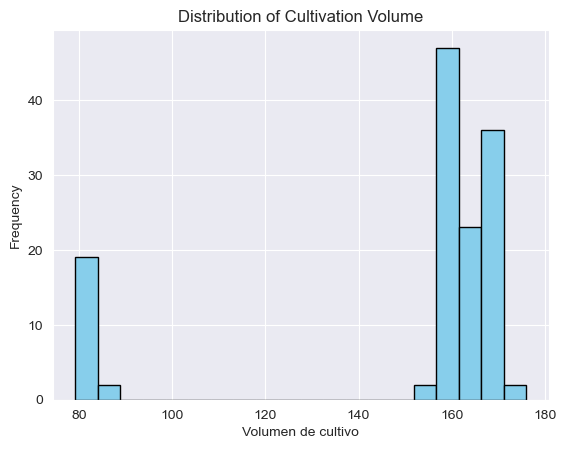

In [19]:
import matplotlib.pyplot as plt

plt.hist(merged_df['Volumen de cultivo'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cultivation Volume')
plt.xlabel('Volumen de cultivo')
plt.ylabel('Frequency')
plt.show()

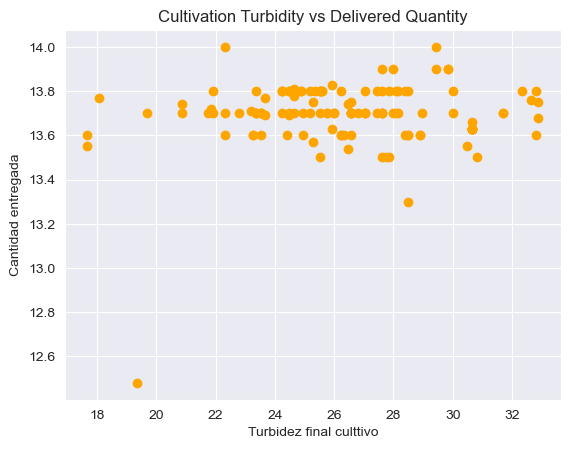

In [20]:
plt.scatter(merged_df['Turbidez final culttivo'], merged_df['Cantidad entregada'], color='orange')
plt.title('Cultivation Turbidity vs Delivered Quantity')
plt.xlabel('Turbidez final culttivo')
plt.ylabel('Cantidad entregada')
plt.show()

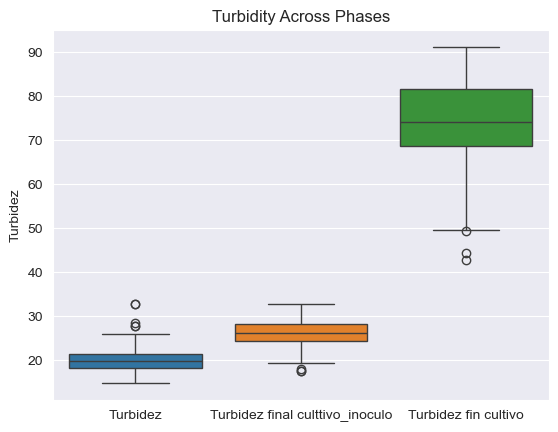

In [21]:
import seaborn as sns

turbidity_columns = ['Turbidez', 'Turbidez final culttivo_inoculo', 'Turbidez fin cultivo']
sns.boxplot(data=merged_df[turbidity_columns])
plt.title('Turbidity Across Phases')
plt.ylabel('Turbidez')
plt.xticks([0, 1, 2], ['Turbidez', 'Turbidez final culttivo_inoculo', 'Turbidez fin cultivo'])
plt.show()

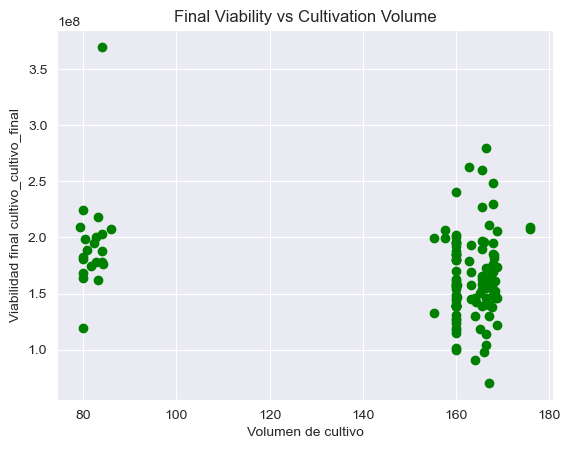

In [22]:
plt.scatter(merged_df['Volumen de cultivo'], merged_df['Viabilidad final cultivo_cultivo_final'], color='green')
plt.title('Final Viability vs Cultivation Volume')
plt.xlabel('Volumen de cultivo')
plt.ylabel('Viabilidad final cultivo_cultivo_final')
plt.show()

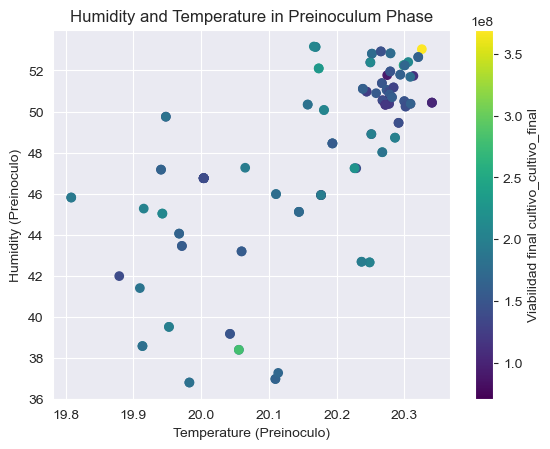

In [23]:
plt.scatter(merged_df['temperature_preinoculo'], merged_df['humedad_preinoculo'], 
            c=merged_df['Viabilidad final cultivo_cultivo_final'], cmap='viridis')
plt.colorbar(label='Viabilidad final cultivo_cultivo_final')
plt.title('Humidity and Temperature in Preinoculum Phase')
plt.xlabel('Temperature (Preinoculo)')
plt.ylabel('Humidity (Preinoculo)')
plt.show()

<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">3. Data Quality Checks</span>

In [24]:
# Missing values
print(merged_df.isna().sum())

LOTE                                      0
Fecha/hora inicio_preinoculo              0
Fecha/hora fin_preinoculo                 0
línea 1                                   0
línea 2                                   0
línea 3                                   0
línea 1                                   0
línea 2                                   0
línea 3                                   0
línea 1                                   0
línea 2                                   0
línea 3                                   0
ID bioreactor                             0
Fecha/hora inicio_inoculo                 0
Fecha/hora fin_inoculo                    0
Volumen de cultivo                        0
Turbidez inicio cultivo                   0
Turbidez final culttivo                   0
Viabilidad final cultivo                  0
Cantidad entregada                        0
Turbidez                                  0
Viabilidad                                0
ID bioreactor_inoculo           

In [25]:
# Unique values
print(merged_df['LOTE'].nunique())
print(merged_df['ID Centrífuga'].unique())
print(merged_df['ID bioreactor'].unique())

124
[17825 14246 12912  6379]
[13171 14618 13172]


<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">4. Relationships and Correlations</span>

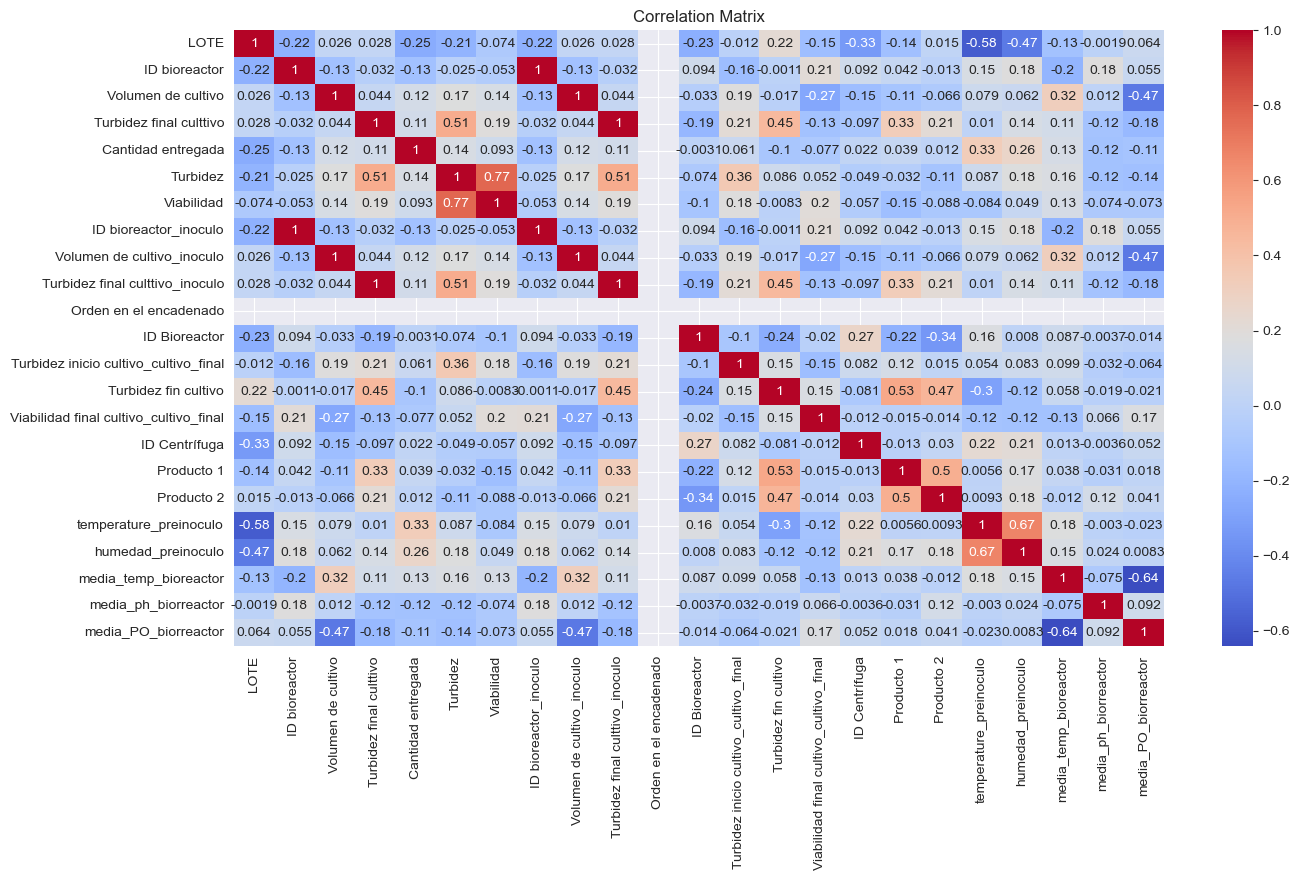

In [26]:
plt.figure(figsize=(15, 8))
# Calculate correlation matrix with only numeric columns
corr_matrix = merged_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">5. Categorical Analysis</span>

In [27]:
print(merged_df['ID Centrífuga'].value_counts())
print(merged_df['ID bioreactor'].value_counts())

14246    48
17825    47
12912    34
6379      2
Name: ID Centrífuga, dtype: int64
13171    49
14618    47
13172    35
Name: ID bioreactor, dtype: int64


<span style="font-family: 'Times New Roman'; font-size: 22px; color: white; font-weight: bold;">6. Numerical Variable Analysis</span>

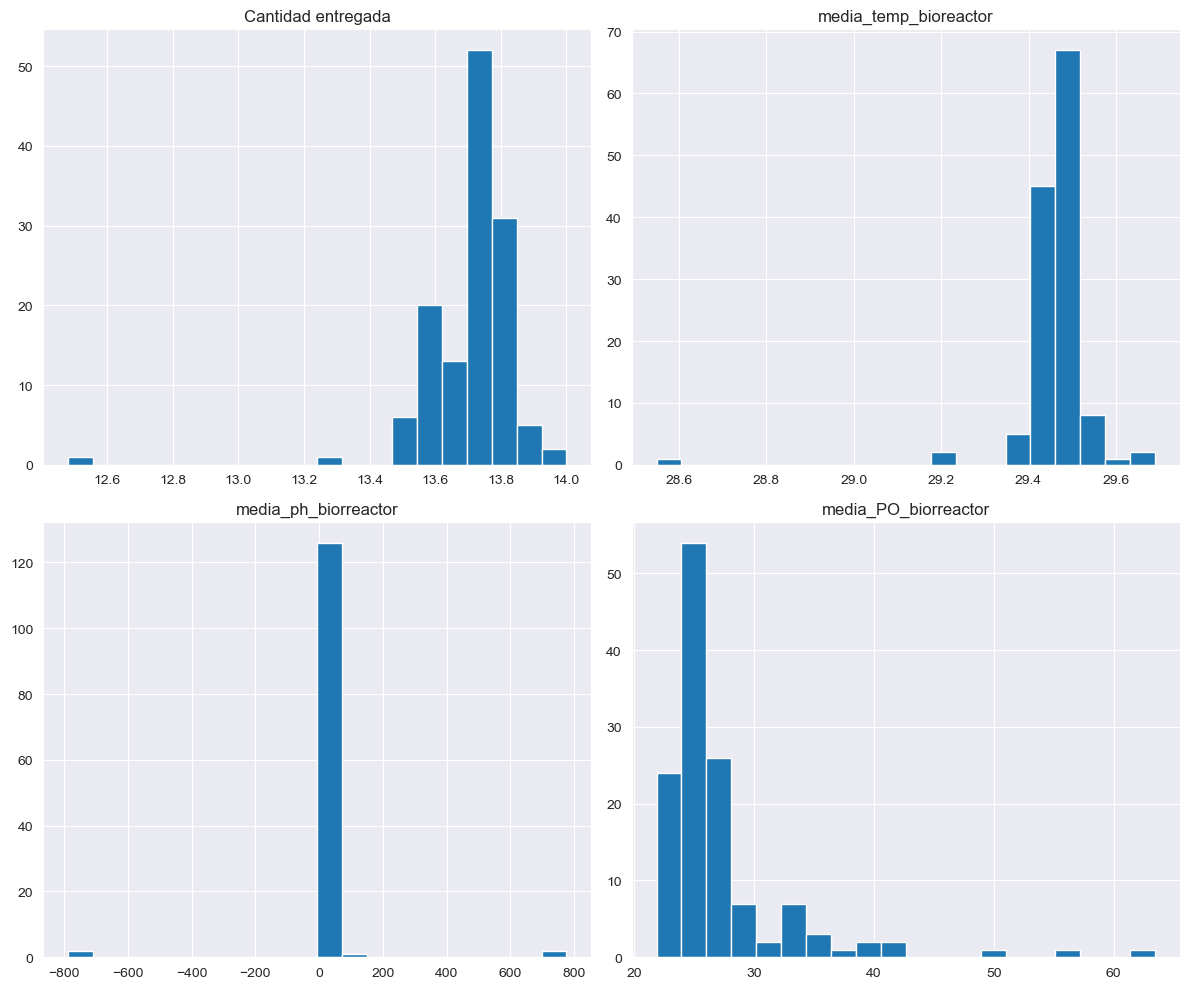

In [28]:
numerical_columns = ['Cantidad entregada', 'media_temp_bioreactor', 'media_ph_biorreactor', 'media_PO_biorreactor']
merged_df[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

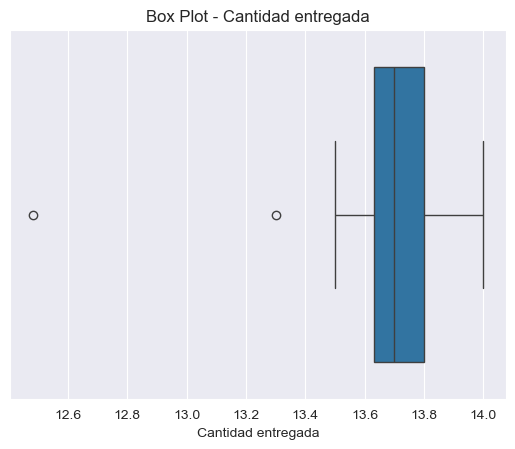

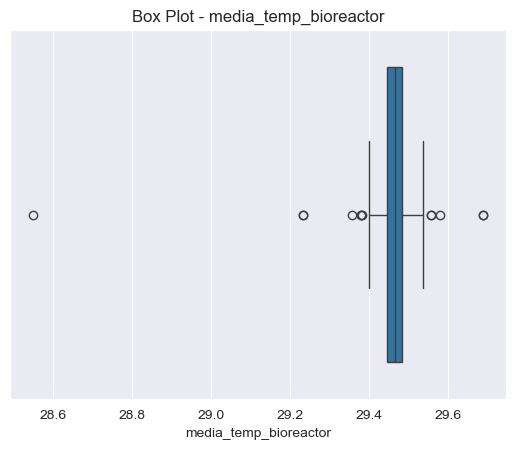

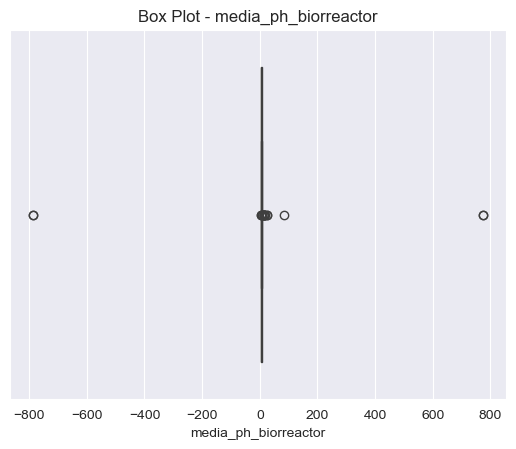

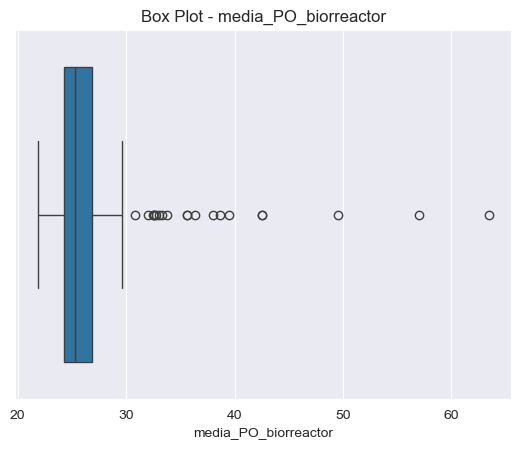

In [29]:
# Outliers 
for column in numerical_columns:
    sns.boxplot(x=merged_df[column])
    plt.title(f'Box Plot - {column}')
    plt.show()